this entire lab was completed by Ben Rees and his sheer will power to do this simulation correctly. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
gray = '#758A93'
cream = '#ECD5BC'
yellow = '#E9B63B'
red = '#C66E52'

#### graph 1 - bulk PI vs Buckled KI vs unbuckled KI vs Exp data

In [7]:
# exp kriigami data load
kirigami_li = 23.79
kirigami_t = 25.4e-3
kirigami_w = 12.2 # mm (from lab 3 calculations)
kirigami_lf = 4838e-3
exp_ki = pd.read_excel('../lab-3/data/kirigami.xlsx', sheet_name='cleaned')
exp_ki['strain'] = (exp_ki['extension'] - 4.8) / kirigami_li
exp_ki['stress'] = exp_ki['force'] / (kirigami_w * kirigami_t)

## simulation data laod
bulk_pi = pd.read_csv('data/Bulk_PI.txt', sep=r'\s+')
buckled_ki = pd.read_csv('data/buckled_KI.txt', sep=r'\s+')
unbuckled_ki = pd.read_csv('data/unbuckled_KI.txt', sep=r'\s+')

In [8]:
hpe_bulk_si = pd.read_csv('data/HPE_Bulk_Si.txt', sep=r'\s+')
bulk_si = pd.read_csv('data/Bulk_Si.txt', sep=r'\s+')

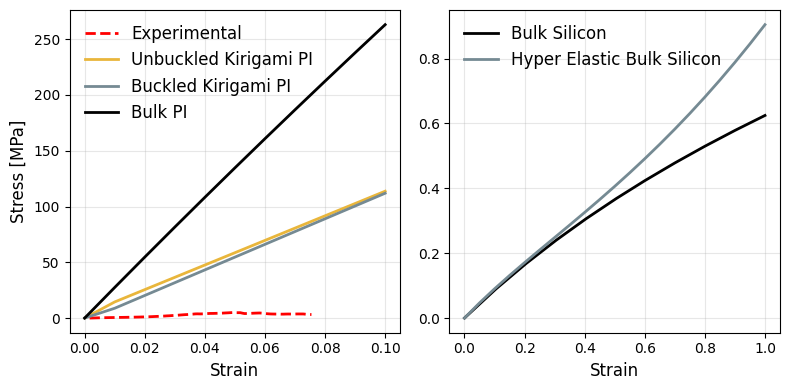

In [ ]:
# plot stress vs strain, all three
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

ax1.plot(exp_ki['strain'][:-150], exp_ki['stress'][:-150],
          color = 'red', linewidth=2, label='Experimental', linestyle='--')
ax1.plot(unbuckled_ki['Strain'], unbuckled_ki['Stress'],
          color = yellow, linewidth=2, label='Unbuckled Kirigami PI')
ax1.plot(buckled_ki['Strain'], buckled_ki['Stress'],
            color = gray, linewidth=2, label='Buckled Kirigami PI')
ax1.plot(bulk_pi['Strain'], bulk_pi['Stress'],
          color = 'black', linewidth=2, label='Bulk PI')
ax1.set_xlabel('Strain', fontsize=12)
ax1.set_ylabel('Stress [MPa]', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.legend(frameon=False, fontsize=12)

ax2.plot(bulk_si['Strain'], bulk_si['Stress'],
          color = 'black', linewidth=2, label='Bulk Silicon')
ax2.plot(hpe_bulk_si['Strain'], hpe_bulk_si['Stress'],
            color = gray, linewidth=2, label='Hyper Elastic Bulk Silicon')
ax2.set_xlabel('Strain', fontsize=12)
ax2.grid(True, alpha=0.3)
# ax2.scatter([0.05], [280], color = red, marker='s') # to mark yield point
ax2.legend(frameon=False, fontsize=12)


plt.tight_layout()
fig.savefig('figs/stress_strain.pdf', dpi=300)

Graph 2 - Bulk SI regular vs bulk SI hyperelastic